In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2023.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000')
df

,New York,New York,Average Temperature,January
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN,NaN
2,Missing: -99,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,189501,29.6,-2.0,NaN
...,...,...,...,...
128,201901,32.6,1.0,NaN
129,202001,39.2,7.6,NaN
130,202101,34.8,3.2,NaN
131,202201,30.4,-1.2,NaN


# 1) Повторити дії описані в пункті «Часові ряди і проста лінійна регресія частина 2» даної лабораторної роботи та порівняти з результатом попередньої лабораторної роботи.

Переменуємо стовпці та використаємо коректні індекси

In [480]:
df = df.drop(columns=' January', axis=1)
df = df.drop(df.index[:4])
df.index = range(len(df))
df

,New York,New York,Average Temperature
0,189501,29.6,-2.0
1,189601,28.8,-2.8
2,189701,29.6,-2.0
3,189801,34.2,2.6
4,189901,30.1,-1.5
...,...,...,...
124,201901,32.6,1.0
125,202001,39.2,7.6
126,202101,34.8,3.2
127,202201,30.4,-1.2


In [481]:
df.columns = ['Year', 'Temperature', 'Anomaly']
df.count()

Year           129
Temperature    129
Anomaly        129
dtype: int64

Змінимо типи данних на коректні

In [482]:
df['Year'] = df['Year'].str[:4].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Anomaly'] = df['Anomaly'].astype(float)
df.dtypes

Year             int32
Temperature    float64
Anomaly        float64
dtype: object

Сплітимо датасет на навчальний та тестовий набор

In [483]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Year'].values.reshape(-1, 1),
                                                    df['Temperature'].values,
                                                    random_state=11)
X_train.shape

(96, 1)

In [484]:
X_test.shape

(33, 1)

Створюємо модель лінійної регресії

In [485]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [486]:
linear_regression.coef_

array([0.0180931])

In [487]:
linear_regression.intercept_

-3.758142508638638

Порівняємо результати на тестовому наборі

In [488]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predict: {p}, expected: {e}')

Predict: 30.528283261792172, expected: 29.6
Predict: 31.704334805368955, expected: 33.2
Predict: 31.921452013413894, expected: 34.3
Predict: 32.51852433553749, expected: 31.3
Predict: 32.57280363754873, expected: 36.5
Predict: 32.409965731515015, expected: 33.9
Predict: 30.926331476541232, expected: 32.4


Прогнозуємо результат для 2019 року

In [489]:
predict = lambda x: (linear_regression.coef_ * x + linear_regression.intercept_)
print(f'Predicted value for 2019 year is', predict(2019)[0])

Predicted value for 2019 year is 32.77182774492326


Діаграма розкиду

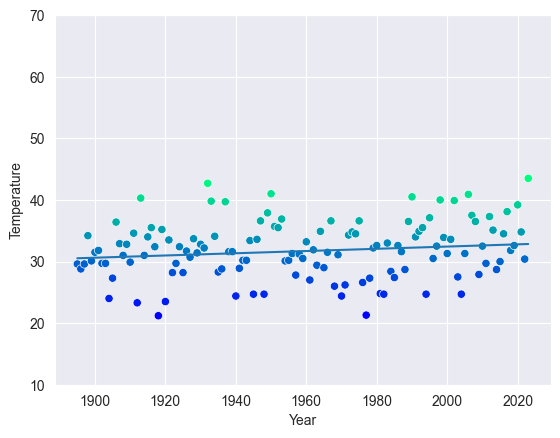

In [490]:
axes = sns.scatterplot(x=df['Year'], y=df['Temperature'], hue=df['Temperature'], palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(df['Year']), max(df['Year'])])
y = predict(x)
line = plt.plot(x, y)

plt.show()

# 2) Аналогічно з прикладом з лекції 7 згенеруйте набір даних та класифікуйте його використавши класифікатор SVC (слайд 95).

In [491]:
X_xor = np.random.randn(200, 2)
X_xor

array([[ 1.76538978e+00,  2.41120280e-01],
       [ 3.96932015e-01,  1.35111757e+00],
       [-5.45707299e-01,  1.15883984e-01],
       [-1.01527003e+00,  8.25060992e-01],
       [-1.53966420e+00, -7.31606465e-01],
       [-2.07087756e-01,  2.68772159e+00],
       [ 1.97212621e-01, -2.82464338e-01],
       [ 1.75194425e+00, -7.21608795e-01],
       [ 4.42591804e-01,  1.23469939e-01],
       [-3.80029150e-01, -3.84657896e-01],
       [-9.81407446e-01, -6.91367975e-01],
       [ 5.25691938e-02,  1.79101650e-01],
       [-1.39009557e+00,  3.86012246e-01],
       [-7.17246629e-01,  7.54458357e-01],
       [ 9.77187941e-01,  9.03023274e-02],
       [-6.22053495e-01,  1.52974729e+00],
       [-2.19513175e+00, -5.84740237e-01],
       [ 1.11647367e-01, -7.24441328e-01],
       [ 1.21240833e+00,  2.54378123e+00],
       [ 1.10628100e+00,  3.36054811e-01],
       [-5.67992615e-01,  9.54579927e-01],
       [-4.83296237e-01,  9.31608855e-01],
       [-1.18763901e-01,  1.34493908e+00],
       [-7.

True = 1 / False = -1

In [492]:
y_xor = np.where(np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0), 1, -1)
y_xor

array([-1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1])

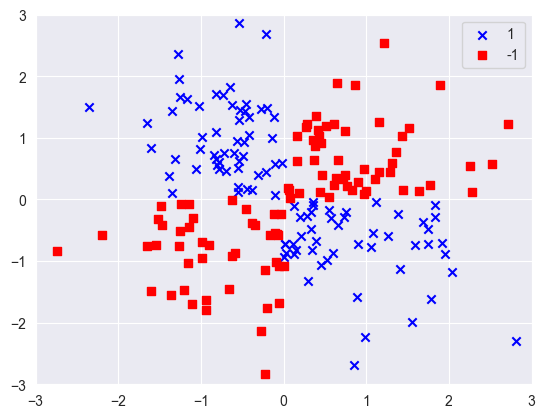

In [493]:
def display_points():
    plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
    plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

    plt.xlim([-3, 3])
    plt.ylim([-3, 3])

    plt.legend(loc='best')
    plt.show()


display_points()

Спліт даних та створення класифікатора

In [494]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, random_state=5)

svc = SVC(kernel='rbf', gamma=0.1, C=10)
svc.fit(X_train, y_train)

predicted = svc.predict(X_test)

In [495]:
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

Z = svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

Контурний графік

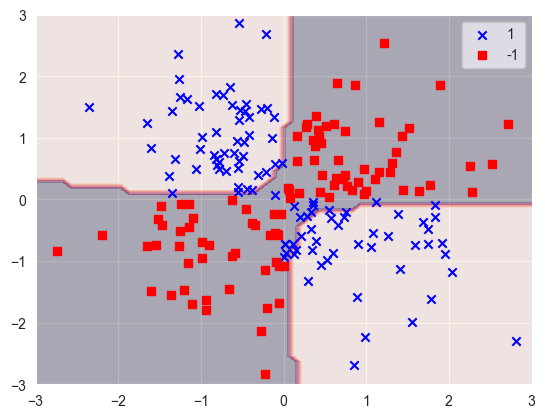

In [496]:
plt.contourf(xx1, xx2, Z, alpha=0.3)
display_points()

# 3) Порівняти декілька класифікаційних оцінювачів наприклад KNeighborsClassifier, SVC та GaussianNB для вбудованого в scikit-learn одного набору даних (вибрати довільний за бажанням).

In [497]:
from sklearn.datasets import load_iris

iris_df = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [498]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, load_iris().target, random_state=5)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


## Тренуємо моделі
KNeighborsClassifier

In [499]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_predicted = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predicted)

print('Accuracy score for KNN with 5 number of neighbors:', knn_accuracy)

Accuracy score for KNN with 5 number of neighbors: 0.9473684210526315


SVC

In [500]:
from sklearn.svm import SVC


svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predicted)

print('Accuracy score for SVC with rbf kernel:', svc_accuracy)

Accuracy score for SVC with rbf kernel: 0.9736842105263158


GaussianNB

In [501]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_predicted = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predicted)

print('Accuracy score for GaussianNB :', gnb_accuracy)

Accuracy score for GaussianNB : 0.9210526315789473
